## Model Training

- we divide the entire text into groups of characters called sequences

"Investors so much about their startup hubs. As a lot of mind I
don’t know the more airborning case of the European of the
schedule, and from such sites"

### 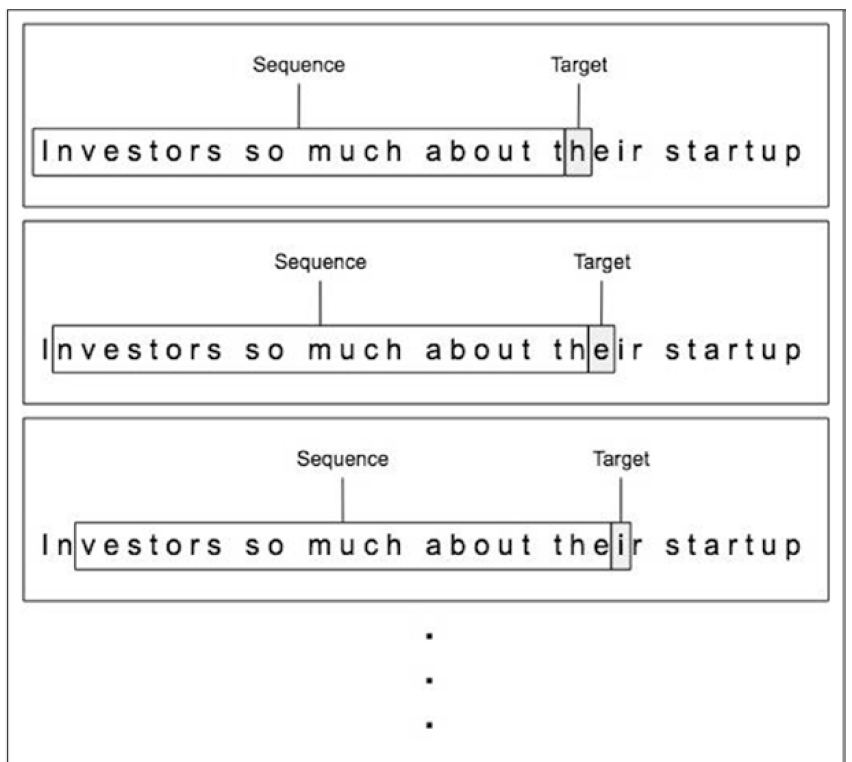

## Inference

## Model Definition

--- LSTM
---- DROPOUT
---- LSTM
----  DROPOUT
----- DENSE
----- SOFTMAX

## Creating Project

In [1]:
import sys
import re
import requests
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense,Activation,Dropout,LSTM

## Download Text

In [9]:
r = requests.get("https://cs.stanford.edu/people/karpathy/namesGenUnique.txt")

In [10]:
r

<Response [200]>

200-300--- success
400-500 : clinet side error
500-600 -server side error

In [11]:
raw_txt = r.text

In [12]:
raw_txt

'jka\nDillie\nRyine\nCherita\nDasher\nChailine\nFrennide\nGremaley\nPatj\nHandi\nGully\nWennie\nFerentra\nJixandlia\nSlimele\nElispor\nKathine\nMasdadina\nChilcina\nTiz\nJolina\nCorbenton\nHaustina\nDelimeet\nEppal\nMolenia\nFrecki\nSenny\nHelphon\nSaminda\nKa\nWynther\nHelsey\nMisa\nLynetta\nHalonie\nBartta\nAnathea\nHelricka\nEnezela\nSherlees\nRandon\nNokminia\nBelli\nRoWindon\nJaena\nMeralin\nOrgen\nWhad\nMeyne\nLuchine\nAlogge\nGren\nKollette\nLeath\nCorth\nMariedia\nRhul\nGenylena\nAkepy\nGabdie\nJehn\nRocelle\nJoeno\nMeruann\nKainy\nDiliar\nOlell\nWelke\nLileen\nArti\nValira\nPaynir\nJuvinge\nKrady\nMogna\nShabfoe\nMandelina\nRosatha\nDacine\nUll\nVonell\nElword\nAngrelly\nKodilla\nLouge\nTemmie\nGerthe\nFildhine\nOlyna\nDibfie\nHarmin\nMellina\nEdongia\nLorant\nBaires\nDasher\nQuengy\nKens\nPaac\nJeencia\nJaiep\nDeua\nAnaline\nMifalia\nConette\nDovanice\nTyberr\nIrda\nGerfand\nAuberro\nThamosa\nBabrield\nKait\nStephepoa\nAbi\nChrristen\nStephanna\nRacky\nDones\nLys\nVira\nPhela

In [13]:
len(raw_txt)

52127

In [15]:
print(raw_txt[:100])

jka
Dillie
Ryine
Cherita
Dasher
Chailine
Frennide
Gremaley
Patj
Handi
Gully
Wennie
Ferentra
Jixandli


### processing Text

In [16]:
raw_txt = raw_txt.replace('\n',' ')

In [17]:
raw_txt

'jka Dillie Ryine Cherita Dasher Chailine Frennide Gremaley Patj Handi Gully Wennie Ferentra Jixandlia Slimele Elispor Kathine Masdadina Chilcina Tiz Jolina Corbenton Haustina Delimeet Eppal Molenia Frecki Senny Helphon Saminda Ka Wynther Helsey Misa Lynetta Halonie Bartta Anathea Helricka Enezela Sherlees Randon Nokminia Belli RoWindon Jaena Meralin Orgen Whad Meyne Luchine Alogge Gren Kollette Leath Corth Mariedia Rhul Genylena Akepy Gabdie Jehn Rocelle Joeno Meruann Kainy Diliar Olell Welke Lileen Arti Valira Paynir Juvinge Krady Mogna Shabfoe Mandelina Rosatha Dacine Ull Vonell Elword Angrelly Kodilla Louge Temmie Gerthe Fildhine Olyna Dibfie Harmin Mellina Edongia Lorant Baires Dasher Quengy Kens Paac Jeencia Jaiep Deua Analine Mifalia Conette Dovanice Tyberr Irda Gerfand Auberro Thamosa Babrield Kait Stephepoa Abi Chrristen Stephanna Racky Dones Lys Vira Phela Deney Dorah Avet Ca iunia Jasqquosius Esty Solumote Hilling Gredie Dynae Berdiah Suynn Tile Blian Mancie Tovey JotaLine M

## -- nltk and spacy

In [18]:
set(raw_txt)

{' ',
 '-',
 '.',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z'}

In [19]:
raw_txt = re.sub('[-.0-9:]','',raw_txt)

In [20]:
set(raw_txt)

{' ',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z'}

In [21]:
raw_txt1 = raw_txt.lower()

In [22]:
set(raw_txt1)

{' ',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z'}

In [23]:
len1 = len(set(raw_txt1))

In [24]:
len1

27

In [27]:
chars = sorted(list(set(raw_txt1)))
arr  =np.arange(0,len1)

char_to_idx = {}
idx_to_char = {}

for i in range(len1):
    char_to_idx[chars[i]] = arr[i]
    idx_to_char[arr[i]]= chars[i]

char_to_idx

{' ': 0,
 'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26}

In [28]:
idx_to_char

{0: ' ',
 1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z'}

In [40]:
maxlen = 5
x_data = []
y_data = []
for i in range(0,len(raw_txt1) - maxlen,1):
    in_seq = raw_txt1[i:i+maxlen]
    out_seq = raw_txt1[i+maxlen]
    x_data.append([char_to_idx[char] for char in in_seq])
    y_data.append([char_to_idx[out_seq]])


nb_chars = len(x_data)
print(f"Text corpus: {nb_chars}")
print(f"Sequences # ",int(len(x_data)/maxlen))

Text corpus: 52038
Sequences #  10407


In [42]:
x = np.reshape(x_data,(nb_chars,maxlen,1))
x = x/float(len(chars))

In [43]:
x

array([[[0.37037037],
        [0.40740741],
        [0.03703704],
        [0.        ],
        [0.14814815]],

       [[0.40740741],
        [0.03703704],
        [0.        ],
        [0.14814815],
        [0.33333333]],

       [[0.03703704],
        [0.        ],
        [0.14814815],
        [0.33333333],
        [0.44444444]],

       ...,

       [[0.33333333],
        [0.62962963],
        [0.77777778],
        [0.18518519],
        [0.        ]],

       [[0.62962963],
        [0.77777778],
        [0.18518519],
        [0.        ],
        [0.        ]],

       [[0.77777778],
        [0.18518519],
        [0.        ],
        [0.        ],
        [0.        ]]])

In [46]:
np.unique(y_data)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26])

In [47]:
y = tf.keras.utils.to_categorical(y_data)

In [49]:
y[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [51]:
x[0]

array([[0.37037037],
       [0.40740741],
       [0.03703704],
       [0.        ],
       [0.14814815]])

In [52]:
y.shape

(52038, 27)

In [54]:
len(y[1])

27

## Define The model

In [56]:
model  = tf.keras.Sequential([
    tf.keras.layers.LSTM(256,input_shape=(maxlen,1),return_sequences=True),
    tf.keras.layers.LSTM(256,return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(len(y[1]),activation='softmax')
])

In [58]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 5, 256)            264192    
                                                                 
 lstm_4 (LSTM)               (None, 5, 256)            525312    
                                                                 
 dropout_1 (Dropout)         (None, 5, 256)            0         
                                                                 
 lstm_5 (LSTM)               (None, 64)                82176     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 27)                1755      
                                                                 
Total params: 873,435
Trainable params: 873,435
Non-trai

## compiling

In [59]:
model.compile(loss='categorical_crossentropy',optimizer='adam')

In [60]:
# filepath = "model_weights_babynames.hdf5"
# checkpoint = ModelCheckpoint(filepath,monitor = 'loss', verbose = 1,save_best_only = True, mode = 'min')
# model_callbacks = [checkpoint]


# model.fit(x,y, epochs = 300, batch_size = 32 ,
# callbacks = model_callbacks)

In [61]:
pattern = []

seed = 'handi'
for i in seed:
    value = char_to_idx[i]
    pattern.append(value)

In [64]:
print(seed)
n_vocab = len(chars)

handi


In [65]:
for i in range(100):
    X  =np.reshape(pattern,(1,len(pattern),1))
    X = X/float(n_vocab)

model = tf.keras.models.load_model('model_weights_babynames.tf')

In [66]:
int_prediction = model.predict(X,verbose=1)

1/1 [==============================] - 11s 11s/step


In [67]:
int_prediction

array([[6.1569017e-01, 2.0056874e-01, 1.4022672e-06, 2.4988381e-05,
        9.1535721e-06, 1.8159145e-01, 5.2179587e-07, 3.6095951e-06,
        1.7737219e-05, 4.2713669e-04, 8.5928811e-09, 1.1947433e-06,
        1.4746372e-04, 5.9309264e-06, 2.6159268e-04, 5.4514332e-04,
        6.5626995e-07, 3.6923331e-10, 2.0046633e-04, 1.8915875e-04,
        7.9298970e-06, 3.3060892e-06, 1.2470869e-08, 8.2907412e-08,
        5.3534563e-08, 3.0206071e-04, 8.7315462e-09]], dtype=float32)

In [68]:
index = np.argmax(int_prediction)
prediction =idx_to_char[index]

In [71]:
prediction

' '

In [73]:
pattern.append(index)
pattern  = pattern[1:len(pattern)]

In [76]:
seed = 'Gully'
print(seed)
n_vocab = len(chars)
for i in range(100):
    X = np.reshape(pattern , (1, len(pattern) , 1))
    X = X/float(n_vocab)
    int_prediction = model.predict(X , verbose = 0)
    index = np.argmax(int_prediction)
    prediction = idx_to_char[index]
    sys.stdout.write(prediction)
    pattern.append(index)
    pattern = pattern[1:len(pattern)]

Gully
silman harline margelley glonne cherrut dammay augis carys churice silman harline margelley glonne c

## Advanced Text Generation

## Generating Novel From and Existing Novel

In [1]:
import sys
import re
import requests
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense,Activation,Dropout,LSTM

## Loading Text

In [2]:
r = requests.get("https://cs.stanford.edu/people/karpathy/char-rnn/warpeace_input.txt")

In [3]:
# r.text

In [3]:
raw_txt = r.text

In [4]:
chars = sorted(list(set(raw_txt)))
print(f'Corpus: {len(raw_txt)}')
print(f"Categories: {len(chars)}")

Corpus: 3258246
Categories: 87


In [5]:
chars

['\n',
 '\r',
 ' ',
 '!',
 '"',
 "'",
 '(',
 ')',
 '*',
 ',',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 ';',
 '=',
 '?',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '\xa0',
 '¤',
 '©',
 'ª',
 '»',
 '¿',
 'Ã',
 'ï']

## Processing Data

In [6]:
ix_to_char = {ix:char for ix,char in enumerate(chars)}
char_to_ix = {char:ix for ix,char in enumerate(chars)}

In [7]:
ix_to_char

{0: '\n',
 1: '\r',
 2: ' ',
 3: '!',
 4: '"',
 5: "'",
 6: '(',
 7: ')',
 8: '*',
 9: ',',
 10: '-',
 11: '.',
 12: '/',
 13: '0',
 14: '1',
 15: '2',
 16: '3',
 17: '4',
 18: '5',
 19: '6',
 20: '7',
 21: '8',
 22: '9',
 23: ':',
 24: ';',
 25: '=',
 26: '?',
 27: 'A',
 28: 'B',
 29: 'C',
 30: 'D',
 31: 'E',
 32: 'F',
 33: 'G',
 34: 'H',
 35: 'I',
 36: 'J',
 37: 'K',
 38: 'L',
 39: 'M',
 40: 'N',
 41: 'O',
 42: 'P',
 43: 'Q',
 44: 'R',
 45: 'S',
 46: 'T',
 47: 'U',
 48: 'V',
 49: 'W',
 50: 'X',
 51: 'Y',
 52: 'Z',
 53: 'a',
 54: 'b',
 55: 'c',
 56: 'd',
 57: 'e',
 58: 'f',
 59: 'g',
 60: 'h',
 61: 'i',
 62: 'j',
 63: 'k',
 64: 'l',
 65: 'm',
 66: 'n',
 67: 'o',
 68: 'p',
 69: 'q',
 70: 'r',
 71: 's',
 72: 't',
 73: 'u',
 74: 'v',
 75: 'w',
 76: 'x',
 77: 'y',
 78: 'z',
 79: '\xa0',
 80: '¤',
 81: '©',
 82: 'ª',
 83: '»',
 84: '¿',
 85: 'Ã',
 86: 'ï'}

In [8]:
char_to_ix

{'\n': 0,
 '\r': 1,
 ' ': 2,
 '!': 3,
 '"': 4,
 "'": 5,
 '(': 6,
 ')': 7,
 '*': 8,
 ',': 9,
 '-': 10,
 '.': 11,
 '/': 12,
 '0': 13,
 '1': 14,
 '2': 15,
 '3': 16,
 '4': 17,
 '5': 18,
 '6': 19,
 '7': 20,
 '8': 21,
 '9': 22,
 ':': 23,
 ';': 24,
 '=': 25,
 '?': 26,
 'A': 27,
 'B': 28,
 'C': 29,
 'D': 30,
 'E': 31,
 'F': 32,
 'G': 33,
 'H': 34,
 'I': 35,
 'J': 36,
 'K': 37,
 'L': 38,
 'M': 39,
 'N': 40,
 'O': 41,
 'P': 42,
 'Q': 43,
 'R': 44,
 'S': 45,
 'T': 46,
 'U': 47,
 'V': 48,
 'W': 49,
 'X': 50,
 'Y': 51,
 'Z': 52,
 'a': 53,
 'b': 54,
 'c': 55,
 'd': 56,
 'e': 57,
 'f': 58,
 'g': 59,
 'h': 60,
 'i': 61,
 'j': 62,
 'k': 63,
 'l': 64,
 'm': 65,
 'n': 66,
 'o': 67,
 'p': 68,
 'q': 69,
 'r': 70,
 's': 71,
 't': 72,
 'u': 73,
 'v': 74,
 'w': 75,
 'x': 76,
 'y': 77,
 'z': 78,
 '\xa0': 79,
 '¤': 80,
 '©': 81,
 'ª': 82,
 '»': 83,
 '¿': 84,
 'Ã': 85,
 'ï': 86}

In [9]:
maxlen = 10
x_data  = []
y_data = []

for i in range(0,len(raw_txt)-maxlen,1):
    in_seq = raw_txt[i:i+maxlen]
    out_seq = raw_txt[i + maxlen]
    x_data.append([char_to_ix[char] for char in in_seq])
    y_data.append([char_to_ix[out_seq]])
nb_chars = len(x_data)
print("Number of sequences: ",int(len(x_data)/maxlen))

Number of sequences:  325823


In [10]:
X  =np.reshape(x_data,(nb_chars,maxlen,1))
n_vocab = len(chars)
X= X/float(n_vocab)

In [11]:
y = tf.keras.utils.to_categorical(y_data)

In [12]:
y[0].shape

(86,)

In [13]:
X.shape

(3258236, 10, 1)

In [14]:
y.shape

(3258236, 86)

### Define the model

In [15]:
import tensorflow as tf
print(tf.__version__)


2.10.0


In [16]:
from tensorflow.keras.mixed_precision import Policy, set_global_policy

policy = Policy('mixed_float16')  # Use mixed precision
set_global_policy(policy)


INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce RTX 4050 Laptop GPU, compute capability 8.9


In [17]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [18]:
Model = tf.keras.Sequential([
    tf.keras.layers.LSTM(800,input_shape=(len(X[1]),1),return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(800,return_sequences=False),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(len(y[1]),activation='softmax')
    
])

In [19]:
Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 800)           2566400   
                                                                 
 dropout (Dropout)           (None, 10, 800)           0         
                                                                 
 lstm_1 (LSTM)               (None, 800)               5123200   
                                                                 
 dropout_1 (Dropout)         (None, 800)               0         
                                                                 
 dense (Dense)               (None, 86)                68886     
                                                                 
Total params: 7,758,486
Trainable params: 7,758,486
Non-trainable params: 0
_________________________________________________________________


In [20]:
Model.compile(loss = 'categorical_crossentropy' ,optimizer = 'adam')

## Creating Checkpoints

In [21]:
filepath = "war_model_weights_saved.hdf5"


checkpoint = ModelCheckpoint(filepath,monitor='loss',verbose=1,save_best_only=True,mode='min')

model_callbacks = [checkpoint]

## customCallback class

In [22]:
epoch_number = 0

filename = 'predictions.txt'

file = open(filename,'w')
file.truncate()
file.close()


In [23]:
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs=None):
        global epoch_number
        epoch_number =  epoch_number +1
        filename = "predictions.txt"
        file = open(filename,'a')
        seed  = "looking fo"
        pattern = []
        for i in seed:
            value = char_to_ix[i]
            pattern.append(value)
        file.seek(0)
        file.write('\n\n Epoch Number: {}\n\n'.format(epoch_number))


        for i in range(100):
            X = np.reshape(pattern , (1, len(pattern) , 1))
            X = X/float(n_vocab)
            int_prediction = Model.predict(X , verbose = 0)
            index = np.argmax(int_prediction)
            prediction = ix_to_char[index]
            file.write(prediction)
            pattern.append(index)
            pattern = pattern[1:len(pattern)]
        file.close() 

In [33]:
Model.fit(X,y,batch_size=256,epochs=10,callbacks=[CustomCallback(),model_callbacks])

Epoch 1/10
12726/12728 [============================>.] - ETA: 0s - loss: 1.7604
Epoch 1: loss improved from inf to 1.76041, saving model to war_model_weights_saved.hdf5
12728/12728 [==============================] - 198s 16ms/step - loss: 1.7604
Epoch 2/10
12726/12728 [============================>.] - ETA: 0s - loss: 1.5940
Epoch 2: loss improved from 1.76041 to 1.59398, saving model to war_model_weights_saved.hdf5
12728/12728 [==============================] - 192s 15ms/step - loss: 1.5940
Epoch 3/10
12725/12728 [============================>.] - ETA: 0s - loss: 1.5081
Epoch 3: loss improved from 1.59398 to 1.50805, saving model to war_model_weights_saved.hdf5
12728/12728 [==============================] - 192s 15ms/step - loss: 1.5081
Epoch 4/10
12728/12728 [==============================] - ETA: 0s - loss: 1.4531
Epoch 4: loss improved from 1.50805 to 1.45307, saving model to war_model_weights_saved.hdf5
12728/12728 [==============================] - 191s 15ms/step - loss: 1.4531


### Training Continuation

In [24]:
try:
    Model.load_weights(filepath)
except Exception as error:
    print(f'Error loading in model: {error}')
    

In [25]:
Model.fit(X,y,batch_size=256,epochs=12,initial_epoch=10,callbacks=[CustomCallback(),model_callbacks])

Epoch 11/12
12726/12728 [============================>.] - ETA: 0s - loss: 1.2936
Epoch 11: loss improved from inf to 1.29361, saving model to war_model_weights_saved.hdf5
12728/12728 [==============================] - 224s 16ms/step - loss: 1.2936
Epoch 12/12
12725/12728 [============================>.] - ETA: 0s - loss: 1.2814
Epoch 12: loss improved from 1.29361 to 1.28136, saving model to war_model_weights_saved.hdf5
12728/12728 [==============================] - 202s 16ms/step - loss: 1.2814
